In [9]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Importing the dataset
dataset = pd.read_csv('household_power_consumption.csv', index_col=0)
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Time_stamp,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [10]:
dataset.index = pd.to_datetime(dataset.index)
# Data consists of comsumption of electricity in a single house in a span of 4 years
# multivariate time series dataset 
numeric_features = ['Global_active_power', 'Global_reactive_power', 'Voltage', 
                    'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
for feature in numeric_features:
    dataset[feature] = pd.to_numeric(dataset[feature], errors='coerce')
dataset.dropna(axis=0, inplace=True)
dataset['Sub_metering_4'] = (dataset['Global_active_power'] * 1000 / 60) - (dataset['Sub_metering_1'] + dataset['Sub_metering_2'] + dataset['Sub_metering_3'])   
numeric_features.append('Sub_metering_4')
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
Time_stamp,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


In [11]:
# Making a new data set by sampling data on everyday basis
# Sum is chosen as the aggregate function, to indicate 
# total power consumption on ca certain day
df = dataset.resample('M').sum()
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
Time_stamp,,,,,,,,
2006-12-31,41813.282,2889.436,5309773.22,176594.8,27460.0,48712.0,162951.0,457765.033333
2007-01-31,63795.714,5559.936,10714523.25,270547.6,72455.0,66382.0,323102.0,601322.900000
2007-02-28,46563.028,4632.204,9671130.63,197378.8,35733.0,65508.0,232883.0,441926.466667
2007-03-31,55277.564,5127.232,10711059.86,234476.0,58307.0,87919.0,280266.0,494800.733333
2007-04-30,38641.408,4788.536,9421339.38,166258.6,45958.0,53811.0,194004.0,350250.466667


In [12]:
# df['Sub_metering_4'].iloc[0:5].plot()

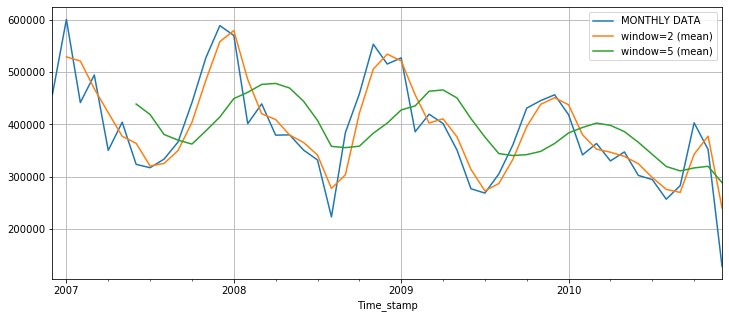

In [13]:
df['Sub_metering_4'].plot(figsize=(12,5), label='MONTHLY DATA', legend=True)
df['Sub_metering_4'].rolling(window=2).mean().plot(grid=True, label='window=2 (mean)', legend=True)
df['Sub_metering_4'].rolling(window=7).mean().plot(grid=True, label='window=5 (mean)', legend=True)

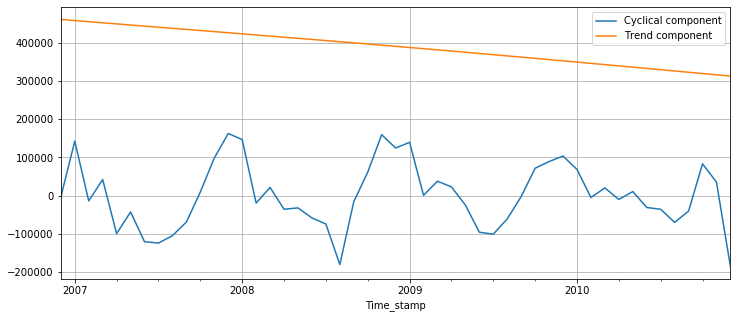

In [14]:
# Using Statsmodels to get the trend

from statsmodels.tsa.filters.hp_filter import hpfilter
_cycle, _trend = hpfilter(df['Sub_metering_4'], lamb=129600)

_cycle.plot(figsize=(12,5), label='Cyclical component', legend=True)
_trend.plot(grid=True, label='Trend component', legend=True)

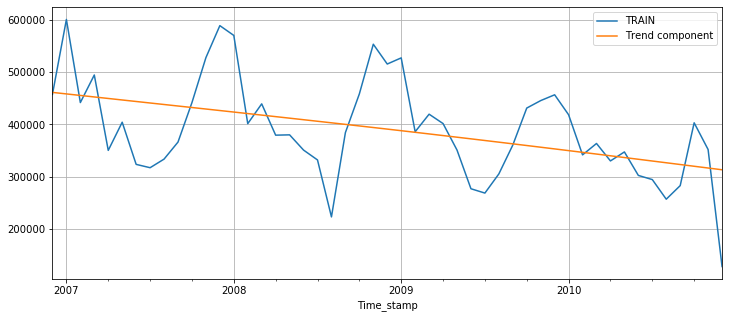

In [17]:
df['Sub_metering_4'].plot(figsize=(12,5), label='TRAIN', legend=True)
_trend.plot(grid=True, label='Trend component', legend=True)

In [18]:
# Seasonal Decomposition: ETS

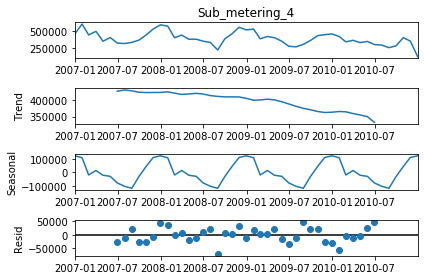

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Sub_metering_4'], model='additive')
result.plot();

In [22]:
# result.resid.plot()

In [23]:
# data['']

In [24]:
# Comparing SMA to EWMA

In [25]:
newDF = df[['Sub_metering_4']].copy()

newDF['6-month-SMA'] = df['Sub_metering_4'].rolling(window=6).mean()
newDF['12-month-SMA'] = df['Sub_metering_4'].rolling(window=12).mean()
newDF.head(15)

,Sub_metering_4,6-month-SMA,12-month-SMA
Time_stamp,,,
2006-12-31,457765.033333,NaN,NaN
2007-01-31,601322.900000,NaN,NaN
2007-02-28,441926.466667,NaN,NaN
2007-03-31,494800.733333,NaN,NaN
2007-04-30,350250.466667,NaN,NaN
2007-05-31,404265.533333,458388.522222,NaN
2007-06-30,323407.500000,435995.600000,NaN
2007-07-31,317010.333333,388610.172222,NaN
2007-08-31,333505.466667,370540.005556,NaN


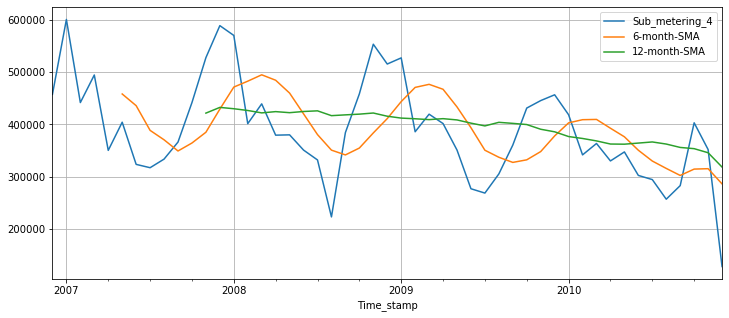

In [26]:
# All SMA can give is treand in the data, nothing more
newDF.plot(figsize=(12,5), grid=True);

In [27]:
# Exponentially Weighted Moving Average

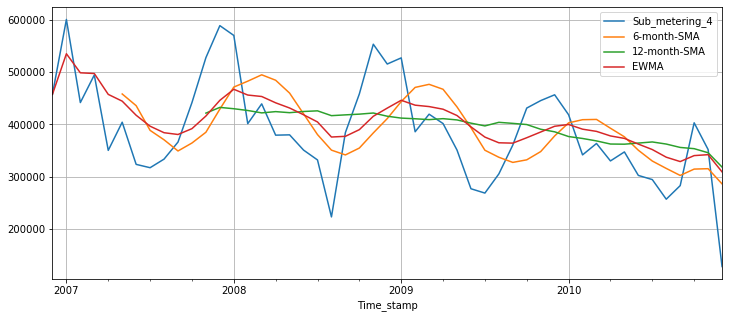

In [28]:
newDF['EWMA'] = newDF['Sub_metering_4'].ewm(span=12).mean()
newDF.plot(figsize=(12,5), grid=True)

In [29]:
# Simple Exponential Smoothing

In [30]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
span = 12
alpha = 2/(span+1)
newDF['EWMA12'] = newDF['Sub_metering_4'].ewm(alpha=alpha,adjust=False).mean()
newDF['SES12']=SimpleExpSmoothing(newDF['Sub_metering_4']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
newDF.head()

,Sub_metering_4,6-month-SMA,12-month-SMA,EWMA,EWMA12,SES12
Time_stamp,,,,,,
2006-12-31,457765.033333,NaN,NaN,457765.033333,457765.033333,457765.033333
2007-01-31,601322.900000,NaN,NaN,535525.544444,479850.858974,479850.858974
2007-02-28,441926.466667,NaN,NaN,498993.802771,474016.337081,474016.337081
2007-03-31,494800.733333,NaN,NaN,497670.214617,477213.936504,477213.936504
2007-04-30,350250.466667,NaN,NaN,457616.795974,457681.094991,457681.094991


In [31]:
# newDF[['Sub_metering_4', 'EWMA12', 'SES12']].plot(figsize=(12,5), grid=True)

In [32]:
# Double Exponential Smoothing

In [33]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
newDF['DESadd12'] = ExponentialSmoothing(newDF['Sub_metering_4'], trend='add').fit().fittedvalues.shift(-1)
newDF.head()

,Sub_metering_4,6-month-SMA,12-month-SMA,EWMA,EWMA12,SES12,DESadd12
Time_stamp,,,,,,,
2006-12-31,457765.033333,NaN,NaN,457765.033333,457765.033333,457765.033333,459164.474039
2007-01-31,601322.900000,NaN,NaN,535525.544444,479850.858974,479850.858974,585841.788984
2007-02-28,441926.466667,NaN,NaN,498993.802771,474016.337081,474016.337081,457598.904418
2007-03-31,494800.733333,NaN,NaN,497670.214617,477213.936504,477213.936504,490749.438874
2007-04-30,350250.466667,NaN,NaN,457616.795974,457681.094991,457681.094991,365550.862487


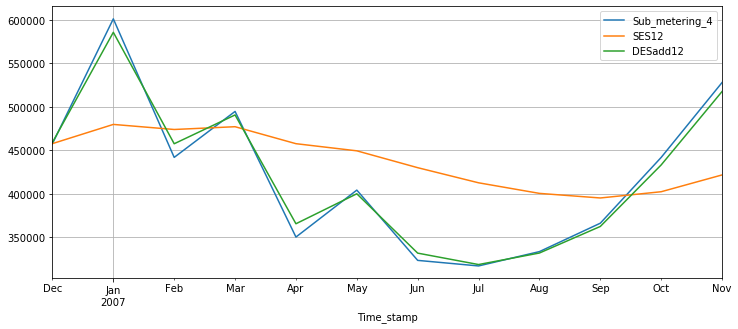

In [34]:
newDF[['Sub_metering_4', 'SES12', 'DESadd12']].iloc[0:12].plot(figsize=(12,5), grid=True)

In [35]:
# Triple Exponential Smoothing

In [36]:
newDF['TESadd12'] = ExponentialSmoothing(newDF['Sub_metering_4'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
newDF.head()

,Sub_metering_4,6-month-SMA,12-month-SMA,EWMA,EWMA12,SES12,DESadd12,TESadd12
Time_stamp,,,,,,,,
2006-12-31,457765.033333,NaN,NaN,457765.033333,457765.033333,457765.033333,459164.474039,476221.736204
2007-01-31,601322.900000,NaN,NaN,535525.544444,479850.858974,479850.858974,585841.788984,535427.921745
2007-02-28,441926.466667,NaN,NaN,498993.802771,474016.337081,474016.337081,457598.904418,446447.384937
2007-03-31,494800.733333,NaN,NaN,497670.214617,477213.936504,477213.936504,490749.438874,502063.275842
2007-04-30,350250.466667,NaN,NaN,457616.795974,457681.094991,457681.094991,365550.862487,415778.043040


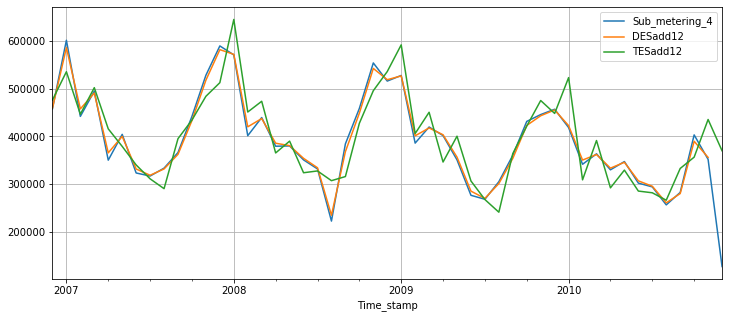

In [37]:
newDF[['Sub_metering_4', 'DESadd12', 'TESadd12']].plot(figsize=(12,5), grid=True)

In [38]:
# Predicting with the Holt-Winters Method

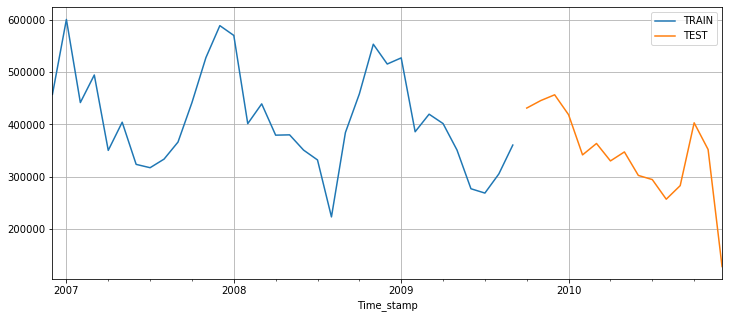

In [39]:
train_data = newDF['Sub_metering_4'].iloc[:-15]
test_data = newDF['Sub_metering_4'].iloc[-15:]
train_data.plot(figsize=(12,5), label='TRAIN', legend=True)
test_data.plot(grid=True, label='TEST', legend=True)

In [41]:
# Fitting to the testing data
from statsmodels.tsa.holtwinters import ExponentialSmoothing
fitted_model = ExponentialSmoothing(train_data,trend='add',seasonal='mul',seasonal_periods=12).fit()

In [42]:
# Evaluating model for the test data
test_predictions = fitted_model.forecast(15)

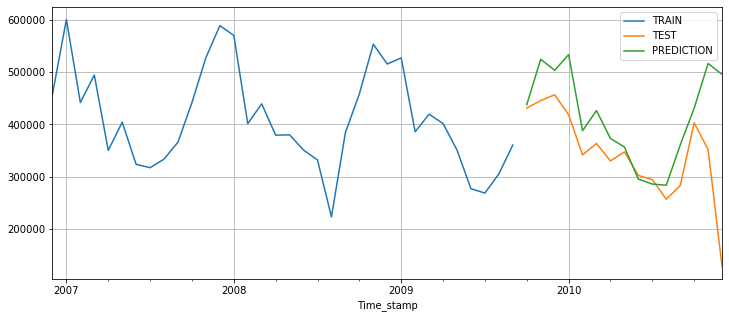

In [43]:
train_data.plot(legend=True,label='TRAIN')
test_data.plot(legend=True,label='TEST',figsize=(12,5))
test_predictions.plot(legend=True,label='PREDICTION', grid=True);

In [44]:
# Evaluation Metrics

In [45]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean Absolute Error:', mean_absolute_error(test_data,test_predictions))
print('Mean Squared Error:' ,mean_squared_error(test_data,test_predictions))
print('Root Mean Square Error:' ,np.sqrt(mean_squared_error(test_data,test_predictions)))

Mean Absolute Error: 72770.3908721642
Mean Squared Error: 13370372619.857561
Root Mean Square Error: 115630.32742259948


In [46]:
test_data.describe()

count        15.000000
mean     343548.813333
std       85737.350332
min      127496.833333
25%      298238.466667
50%      347280.066667
75%      410848.566667
max      456842.366667
Name: Sub_metering_4, dtype: float64

In [47]:
# Forecasting into the Future

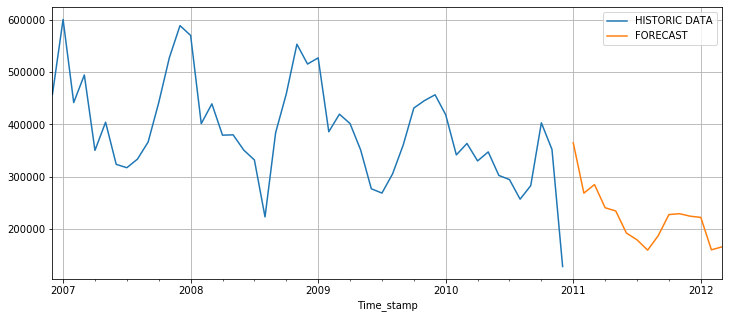

In [48]:
final_model = ExponentialSmoothing(newDF['Sub_metering_4'],trend='add',seasonal='mul',seasonal_periods=12).fit()
forecast_predictions = final_model.forecast(15)
newDF['Sub_metering_4'].plot(figsize=(12,5), label='HISTORIC DATA', legend=True)
forecast_predictions.plot(label='FORECAST', legend=True, grid=True);

In [49]:
train_data = train_data[:,np.newaxis]
test_data = test_data[:,np.newaxis]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(train_data)

scaled_train = scaler.transform(train_data)
scaled_test = scaler.transform(test_data)

In [67]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [68]:
# fit model
model.fit_generator(generator,epochs=100)

  ...
    to  
  ['...']
Train for 22 steps
Epoch 1/100
22/22 [==============================] - 3s 115ms/step - loss: 0.1720
Epoch 2/100
22/22 [==============================] - 1s 36ms/step - loss: 0.0690
Epoch 3/100
22/22 [==============================] - 1s 40ms/step - loss: 0.0674
Epoch 4/100
22/22 [==============================] - 1s 35ms/step - loss: 0.0677
Epoch 5/100
22/22 [==============================] - 1s 35ms/step - loss: 0.0654
Epoch 6/100
22/22 [==============================] - 1s 35ms/step - loss: 0.0644
Epoch 7/100
22/22 [==============================] - 1s 32ms/step - loss: 0.0577
Epoch 8/100
22/22 [==============================] - 1s 38ms/step - loss: 0.0604
Epoch 9/100
22/22 [==============================] - 1s 30ms/step - loss: 0.0776
Epoch 10/100
22/22 [==============================] - 1s 41ms/step - loss: 0.0510
Epoch 11/100
22/22 [==============================] - 1s 31ms/step - loss: 0.0443
Epoch 12/100
22/22 [==============================] - 1s 38ms/

22/22 [==============================] - 1s 32ms/step - loss: 0.0103
Epoch 100/100
22/22 [==============================] - 1s 57ms/step - loss: 0.0129


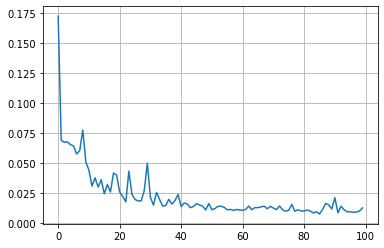

In [69]:
model.history.history.keys()
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
plt.grid()

In [65]:
# Evaluate on Test Data

In [80]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(2*len(test_data)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [81]:
true_predictions = scaler.inverse_transform(test_predictions)

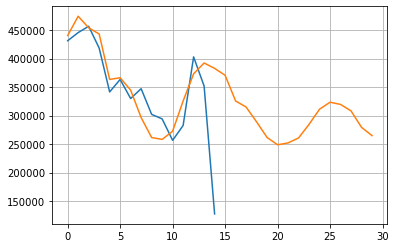

In [85]:
plt.plot(test_data, label='TEST')
plt.plot(true_predictions, label='')
plt.grid()